In [80]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
#changing the directory to Assignment1
%cd /content/drive/MyDrive/ConceptAI/Assignment1

/content/drive/MyDrive/ConceptAI/Assignment1


In [82]:
#listing the directory
! ls

 2406765_parash_kumar_bista.ipynb
'Assignment - 1 - Statistical Interpretation and Exploratory Data Analysis.pdf'
 south_asia_data.csv
'World Happiness Report.csv'


# 3 Tasks - To - Do:

## 3.1 Problem 1 - Getting started with Data Exploration

### 1. Data exploration and Understanding::


*   Dataset Overview



In [83]:
# 1. load the dataset and display the first 10 rows
import pandas as pd
file_path = 'World Happiness Report.csv'
data = pd.read_csv(file_path)
data.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [84]:
# 2. Identify the number of rows and columns in the dataset
num_rows,num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 143
Number of columns: 9


In [85]:
# 3. list all columns and their data types
data.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64




*   Basic Statistics:



In [86]:
# 1. Calculate the mean, median, and standard deviation for the score column
score_mean = data['score'].mean()
score_median = data['score'].median()
score_std = data['score'].std()

score_mean, score_median, score_std


(5.52758041958042, 5.785, 1.1707165099442995)

In [87]:
# 2. Identify the country with highest and lowest happiness score.
highest_score_country = data.loc[data['score'].idxmax(), ['Country name', 'score']]
lowest_score_country = data.loc[data['score'].idxmin(), ['Country name', 'score']]

highest_score_country, lowest_score_country


(Country name    Finland
 score             7.741
 Name: 0, dtype: object,
 Country name    Afghanistan
 score                 1.721
 Name: 142, dtype: object)

In [88]:
# 1. Check if there are any missing values in the dataset. If so, display the total count for each column.
missing_values = data.isnull().sum()

missing_values


,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3




*   Filtering and Sorting:


In [89]:
# Filter the dataset to show only the countries with a Score greater than 7.5.
filtered_data = data[data['score'] > 7.5]
filtered_data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [90]:
sorted_by_GDP = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
sorted_by_GDP.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082




*   Adding new columns


In [91]:
# 1. Create a new column called Happiness Category that categorizes countries into three categories

def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness Category'] = data['score'].apply(categorize_happiness)
data.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


### Data visualizations:

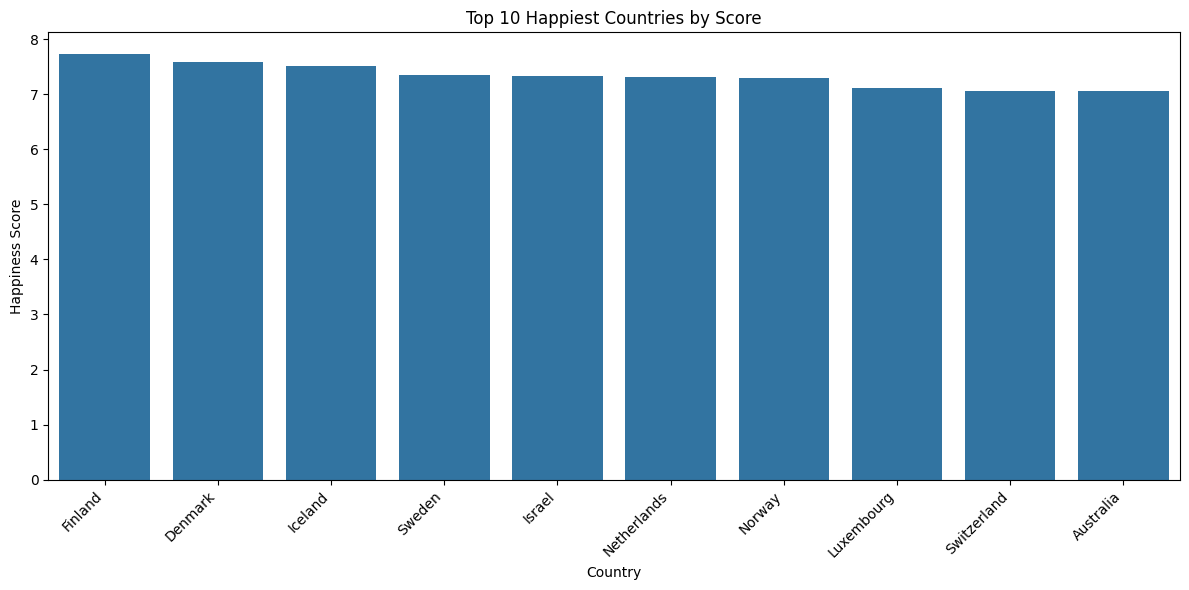

In [92]:

# Plotting the top 10 happiest countries by Score using a bar chart.

import matplotlib.pyplot as plt
import seaborn as sns

# Sorting the DataFrame by 'Score' in descending order and get the top 10
top_10_countries = data.sort_values('score', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Country name', y='score', data=top_10_countries)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

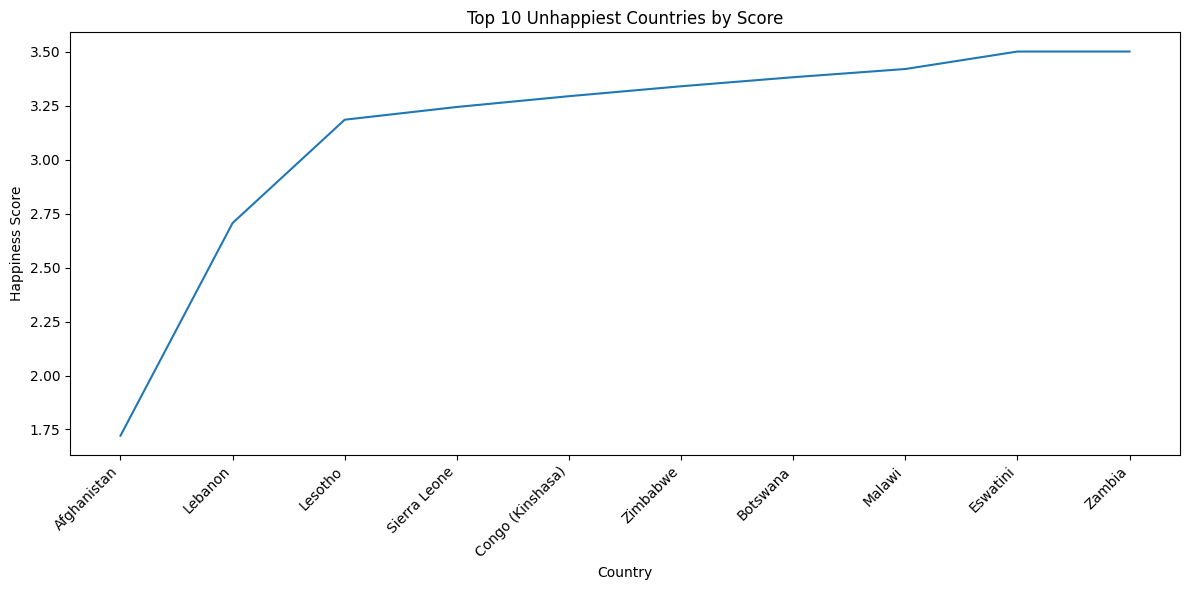

In [93]:
# Plotting the top 10 unhappiest countries by Score using a Line chart.

top_10_unhappy_countries = data.sort_values('score',ascending = True).head(10)
plt.figure(figsize=(12,6))
sns.lineplot(x='Country name', y ='score', data = top_10_unhappy_countries)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

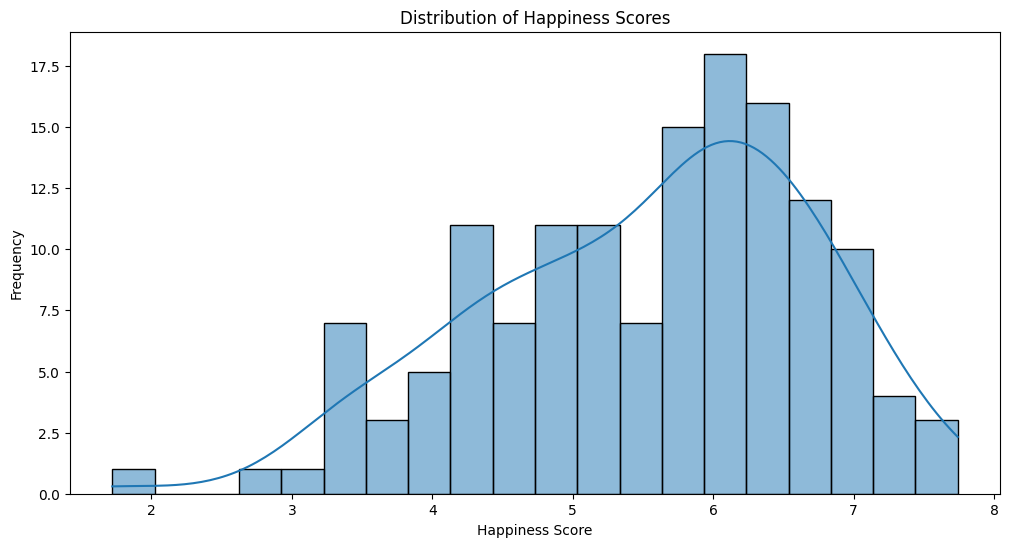

In [94]:
#Plotting a histogram for the Score column to show its distribution and also interpret.

plt.figure(figsize=(12, 6))
sns.histplot(data['score'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


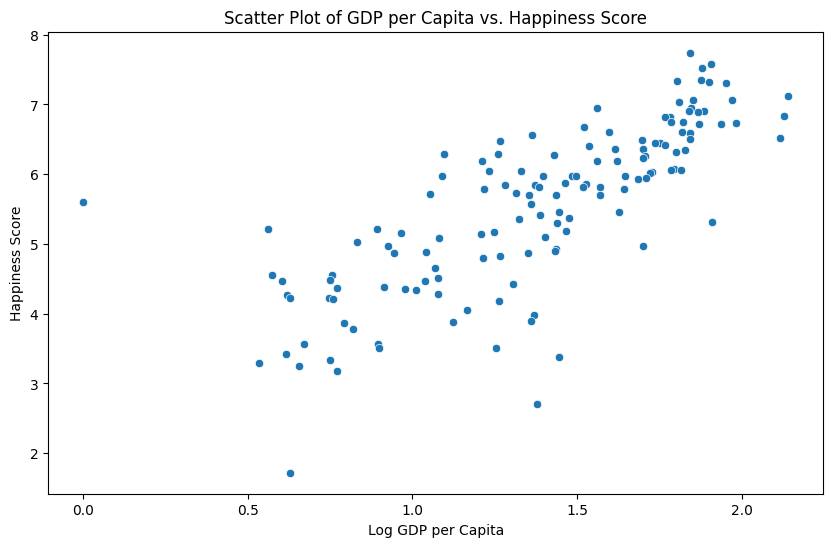

In [95]:
# Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data)
plt.title('Scatter Plot of GDP per Capita vs. Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

## 3.2 Problem - 2 - Some Advance Data Exploration Task:

### Task - 1 - Setup Task - Preparing the South-Asia Dataset:

In [96]:
# Steps:
# 1. Define the countries in South Asia with a list for example:
# south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
# "Maldives", "Nepal", "Pakistan", "Srilanka"]

# Define the list of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

In [97]:
# 2. Filter the dataset to include only South Asian countries
south_asia_data = data[data['Country name'].isin(south_asian_countries)]

# Display the filtered dataset
south_asia_data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [98]:
#3 Save the south asia data
south_asia_data.to_csv('south_asia_data.csv', index=False)

### Task - 2 - Composite Score Ranking:

In [99]:
# 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
# following metrics:
# Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support
# + 0.30 × Healthy Life Expectancy

# Calculate the Composite Score
south_asia_data['Composite Score'] = (0.40 * south_asia_data['Log GDP per capita'] +
                                      0.30 * south_asia_data['Social support'] +
                                      0.30 * south_asia_data['Healthy life expectancy'])

# Display the DataFrame with the new column
south_asia_data

<ipython-input-99-6cfc0fb469cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['Composite Score'] = (0.40 * south_asia_data['Log GDP per capita'] +


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


In [100]:
# 2. Rank the South Asian countries based on the Composite Score in descending order.

# Sort the South Asian countries by Composite Score in descending order
ranked_countries = south_asia_data.sort_values('Composite Score', ascending=False)

# Display the ranked countries
print(ranked_countries[['Country name', 'Composite Score']])

    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


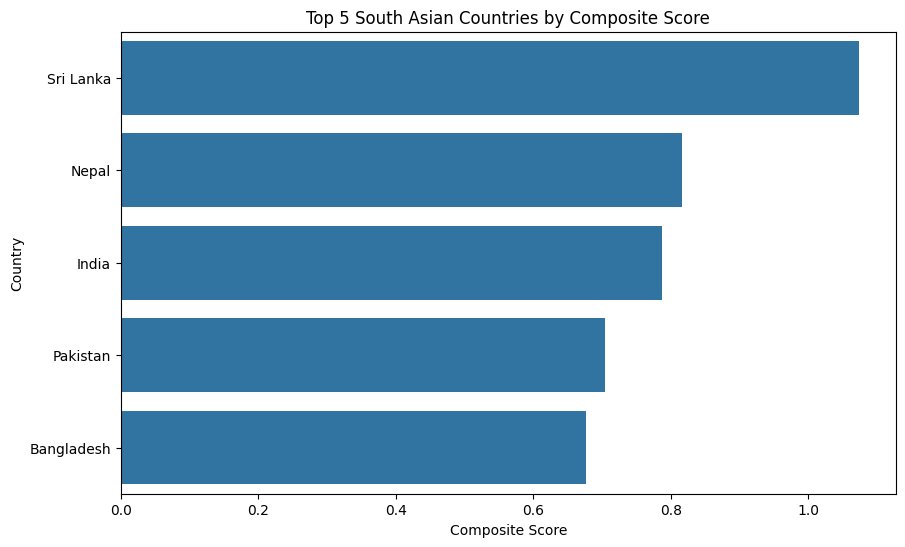

In [101]:
# 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

# Assuming 'ranked_countries' DataFrame from the previous code is available

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=ranked_countries.head(5), orient='h')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

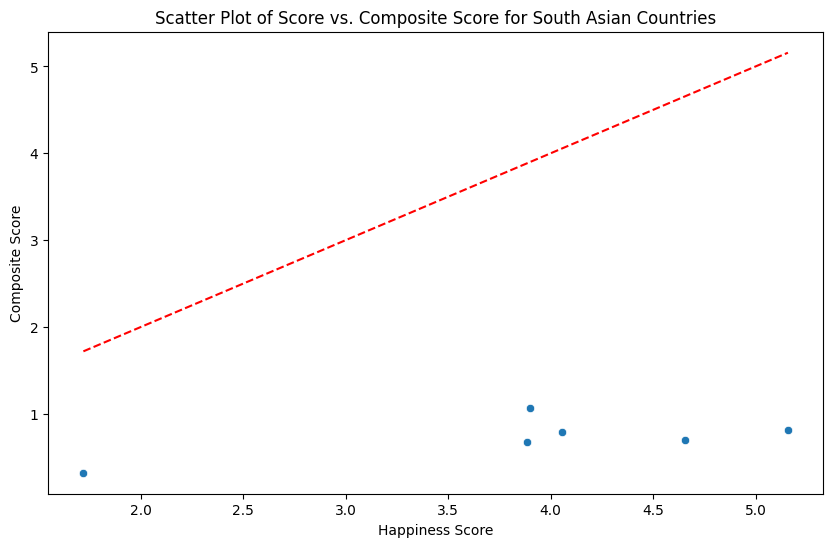

Correlation between Score and Composite Score: 0.6843877715791373

Discussion:
The scatter plot and correlation coefficient provide insights into the relationship between the original Happiness Score and the calculated Composite Score.
A moderate positive correlation indicates a reasonable degree of alignment, but there may be some discrepancies.
The rankings based on the two metrics might not always perfectly match.
The red dashed line in the scatter plot represents perfect agreement. Deviations from this line show discrepancies between the two scores.


In [102]:
# 4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
# discussion with some visualization plot.

# Create a scatter plot to visualize the relationship between 'Score' and 'Composite Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='Composite Score', data=south_asia_data)
plt.title('Scatter Plot of Score vs. Composite Score for South Asian Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Composite Score')

# Add a diagonal line for reference (perfect alignment)
plt.plot([south_asia_data['score'].min(), south_asia_data['score'].max()],
         [south_asia_data['score'].min(), south_asia_data['score'].max()],
         color='red', linestyle='--')


plt.show()

# Calculate the correlation between 'Score' and 'Composite Score'
correlation = south_asia_data['score'].corr(south_asia_data['Composite Score'])
print(f"Correlation between Score and Composite Score: {correlation}")


# Discuss the alignment of rankings
print("\nDiscussion:")
print("The scatter plot and correlation coefficient provide insights into the relationship between the original Happiness Score and the calculated Composite Score.")

if correlation > 0.7:
    print("A high positive correlation suggests a strong alignment between the two rankings.")
    print("Countries with higher Happiness Scores generally have higher Composite Scores, and vice-versa.")
elif correlation > 0.3:
    print("A moderate positive correlation indicates a reasonable degree of alignment, but there may be some discrepancies.")
    print("The rankings based on the two metrics might not always perfectly match.")
else:
    print("A low or near-zero correlation suggests that the Composite Score does not strongly reflect the original Happiness Score.")
    print("The rankings based on these two metrics may differ considerably.")

print("The red dashed line in the scatter plot represents perfect agreement. Deviations from this line show discrepancies between the two scores.")

Task-3- Outlier Detection

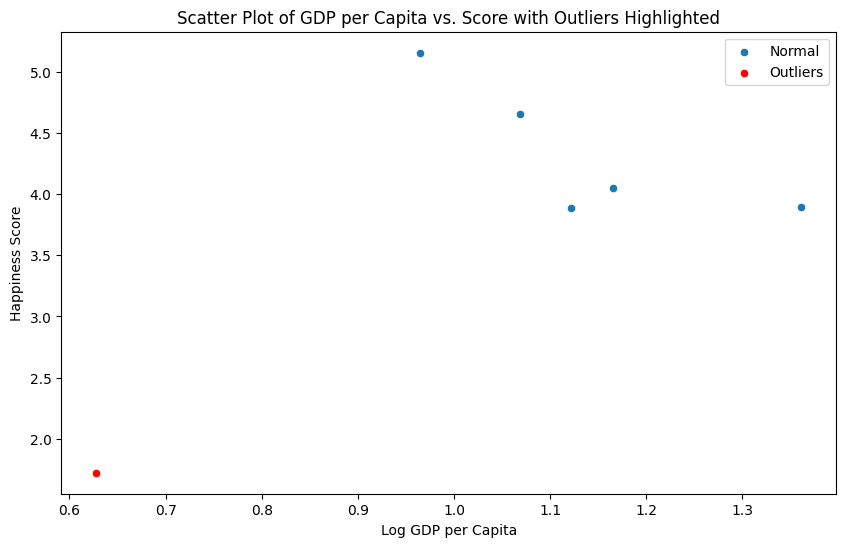

In [103]:

 # Calculate quantiles and IQR for Score
Q1_score = south_asia_data['score'].quantile(0.25)
Q3_score = south_asia_data['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

# Calculate quantiles and IQR for GDP per Capita
Q1_gdp = south_asia_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asia_data['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Define upper and lower bounds for outliers
upper_bound_score = Q3_score + 1.5 * IQR_score
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp
lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp

# Identify outlier countries
outliers = south_asia_data[
    (south_asia_data['score'] > upper_bound_score) | (south_asia_data['score'] < lower_bound_score) |
    (south_asia_data['Log GDP per capita'] > upper_bound_gdp) | (south_asia_data['Log GDP per capita'] < lower_bound_gdp)
]

import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, label='Normal')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title('Scatter Plot of GDP per Capita vs. Score with Outliers Highlighted')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()







Task-4 - Exploring Trends Across Metrics:



Correlations with Score (South Asia):
Freedom to make life choices    0.800519
Generosity                      0.874512
Name: score, dtype: float64


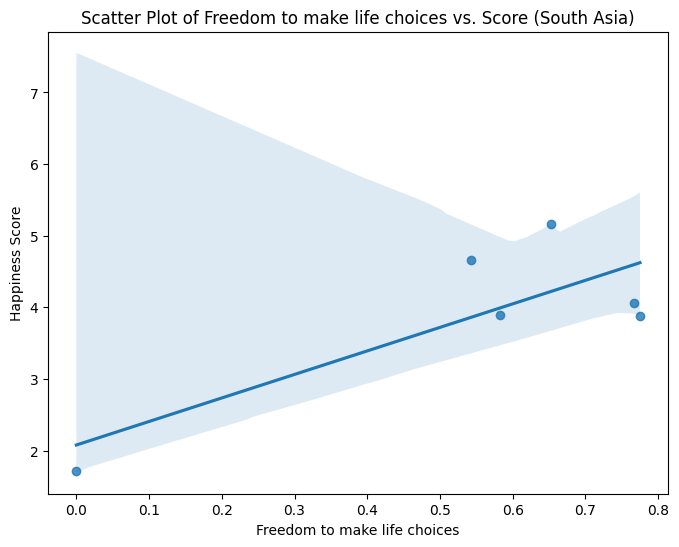

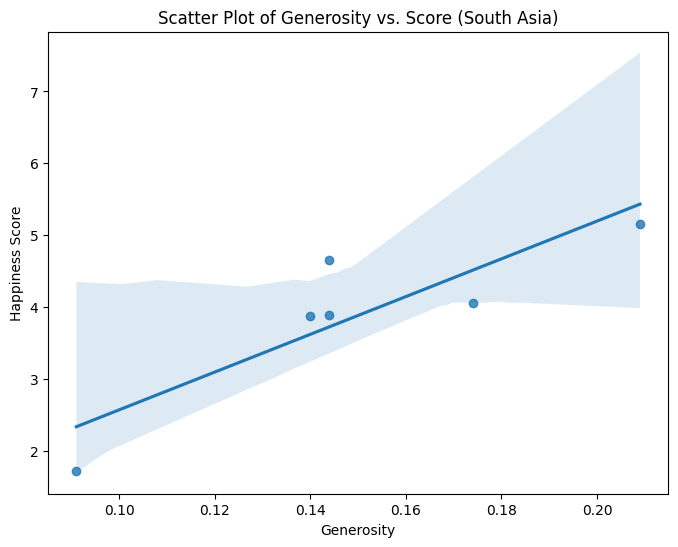


Strongest and Weakest Relationships (South Asia):
Strongest Relationship: Score vs. Generosity (Correlation: 0.87)
Weakest Relationship: Score vs. Freedom to make life choices (Correlation: 0.80)


In [104]:
# Choose two metrics (replace with your desired metrics)
metrics = ['Freedom to make life choices', 'Generosity']

# Calculate correlations with Score
correlations = south_asia_data[['score'] + metrics].corr()

# Print correlations (Pearson correlation)
print("\nCorrelations with Score (South Asia):")
print(correlations['score'][1:])  # Exclude correlation with itself (score vs. score)

# Create scatter plots with trendlines
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=metric, y='score', data=south_asia_data)
    plt.title(f'Scatter Plot of {metric} vs. Score (South Asia)')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.show()

# --- Identifying Strongest and Weakest Relationships ---

# Get absolute correlation values for comparison
abs_correlations = correlations['score'][1:].abs()

# Find strongest and weakest relationships
strongest_metric = abs_correlations.idxmax()
weakest_metric = abs_correlations.idxmin()

print("\nStrongest and Weakest Relationships (South Asia):")
print(f"Strongest Relationship: Score vs. {strongest_metric} (Correlation: {correlations['score'][strongest_metric]:.2f})")
print(f"Weakest Relationship: Score vs. {weakest_metric} (Correlation: {correlations['score'][weakest_metric]:.2f})")





Task-5 - Gap Analysis:


Ascending Rank:
   Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888
3   Bangladesh         -2.764
4    Sri Lanka         -2.537
5  Afghanistan         -1.093

Descending Rank:
   Country name  GDP-Score Gap
0  Afghanistan         -1.093
1    Sri Lanka         -2.537
2   Bangladesh         -2.764
3        India         -2.888
4     Pakistan         -3.588
5        Nepal         -4.193


<ipython-input-105-f061f807a97d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']


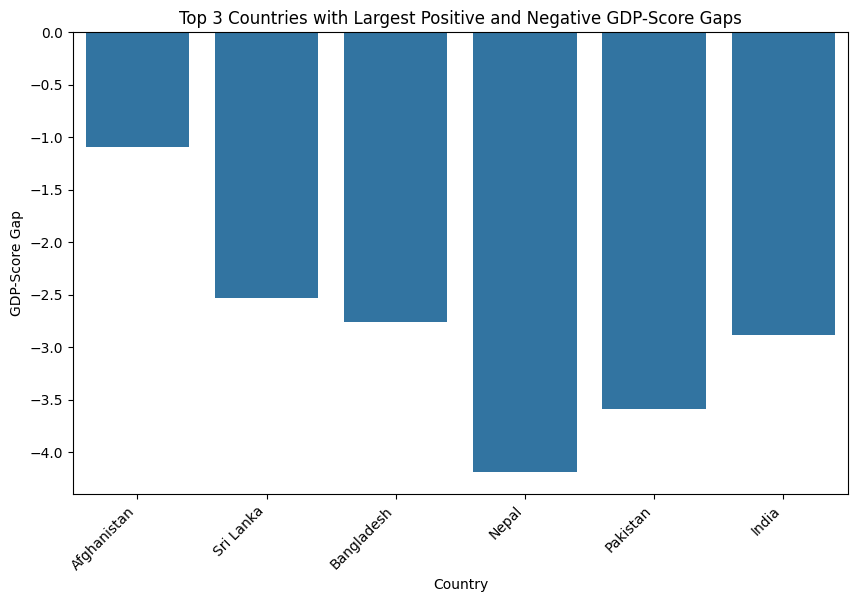

In [105]:
#1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country
# Calculate the GDP-Score Gap
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

#2. Rank the South Asian countries by this gap in both ascending and descending order.
# Rank by ascending order
ascending_rank = south_asia_data.sort_values('GDP-Score Gap').reset_index()[['Country name', 'GDP-Score Gap']]
print("Ascending Rank:\n", ascending_rank)

# Rank by descending order
descending_rank = south_asia_data.sort_values('GDP-Score Gap', ascending=False).reset_index()[['Country name', 'GDP-Score Gap']]
print("\nDescending Rank:\n", descending_rank)

#3.Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 3 positive and negative gaps
top_positive = descending_rank.head(3)
top_negative = ascending_rank.head(3)

# Concatenate the DataFrames
top_gaps = pd.concat([top_positive, top_negative])

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='GDP-Score Gap', data=top_gaps)
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.xticks(rotation=45, ha='right')
plt.show()



#3.3 Problem - 3 - Comparative Analysis:
#Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

In [106]:
middle_east_cpuntries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]
middle_east_data = data[data['Country name'].isin(middle_east_cpuntries)]
middle_east_data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


1.Descriptive Statistics

Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

Which region has higher happiness Scores on average?

In [107]:
# Define the list of Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Filter the dataset to include only Middle Eastern countries
middle_east_data = data[data['Country name'].isin(middle_east_countries)]

# Display the filtered dataset to check if it's created correctly
middle_east_data.head()

# Calculate mean and standard deviation of Score for both regions
south_asia_mean = south_asia_data['score'].mean()
south_asia_std = south_asia_data['score'].std()
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

print(f"South Asia - Mean Score: {south_asia_mean:.2f}, Standard Deviation: {south_asia_std:.2f}")
print(f"Middle East - Mean Score: {middle_east_mean:.2f}, Standard Deviation: {middle_east_std:.2f}")

# Compare average happiness scores
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")

South Asia - Mean Score: 3.90, Standard Deviation: 1.18
Middle East - Mean Score: 5.41, Standard Deviation: 1.57
Middle East has a higher average happiness score.


2.Top and Bottom Performers:

• Identify the top 3 and bottom 3 countries in each region based on the score.

•Plot bar charts comparing these charts.

In [108]:
# South Asia
south_asia_top3 = south_asia_data.sort_values('score', ascending=False).head(3)
south_asia_bottom3 = south_asia_data.sort_values('score').head(3)

# Middle East
middle_east_top3 = middle_east_data.sort_values('score', ascending=False).head(3)
middle_east_bottom3 = middle_east_data.sort_values('score').head(3)

print(south_asia_top3)
print(middle_east_top3)
print(south_asia_bottom3)
print(middle_east_bottom3)



    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
92                       0.115                1.783             Medium   
107                      0.074                1.907             Medium   
125                      0.122                0.756             Medium   

     Composite Score  GDP-Score Gap  
92            0.8159         -4.193  
107           0.7039         -3.588  
125           0.7874         -2.888  
 

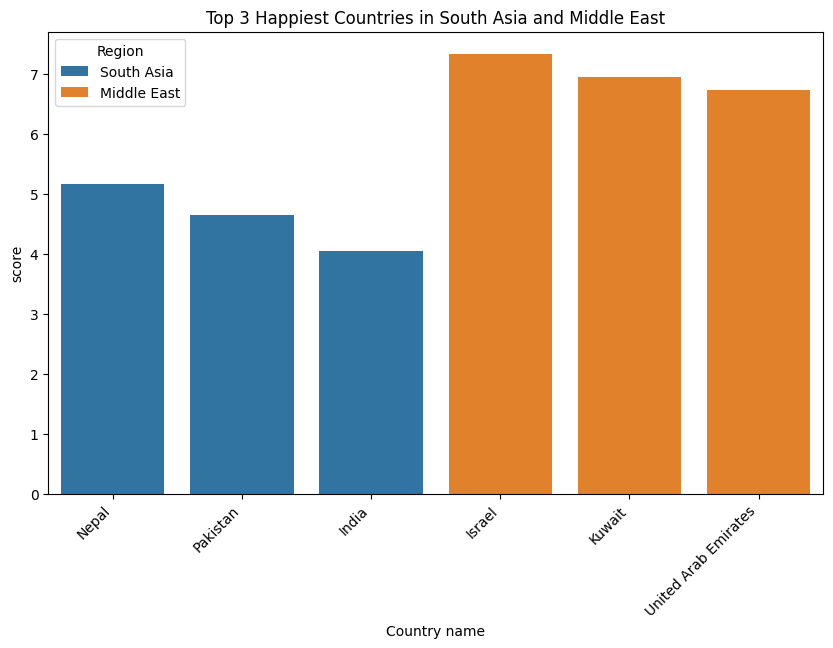

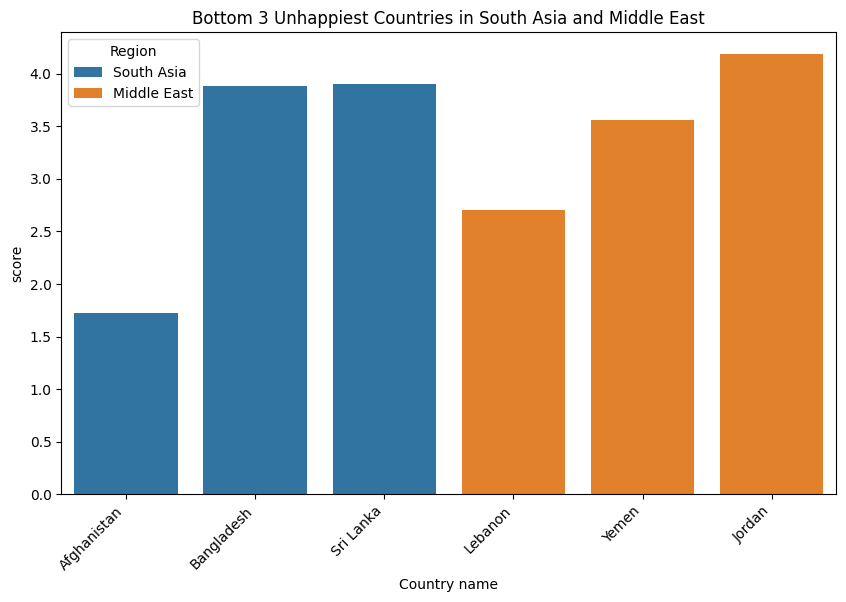

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Make sure pandas is imported

# Add a 'Region' column to each DataFrame before concatenating
south_asia_top3['Region'] = 'South Asia'
middle_east_top3['Region'] = 'Middle East'

# Top 3 countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='score', data=pd.concat([south_asia_top3, middle_east_top3]), hue='Region')
plt.title('Top 3 Happiest Countries in South Asia and Middle East')
plt.xticks(rotation=45, ha='right')
plt.show()

# Repeat the same for bottom 3 countries
south_asia_bottom3['Region'] = 'South Asia'
middle_east_bottom3['Region'] = 'Middle East'

# Bottom 3 countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='score', data=pd.concat([south_asia_bottom3, middle_east_bottom3]), hue='Region')
plt.title('Bottom 3 Unhappiest Countries in South Asia and Middle East')
plt.xticks(rotation=45, ha='right')
plt.show()


3.Metric Comparisons:

1.Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

2.Which metrics show the largest disparity between the two regions?

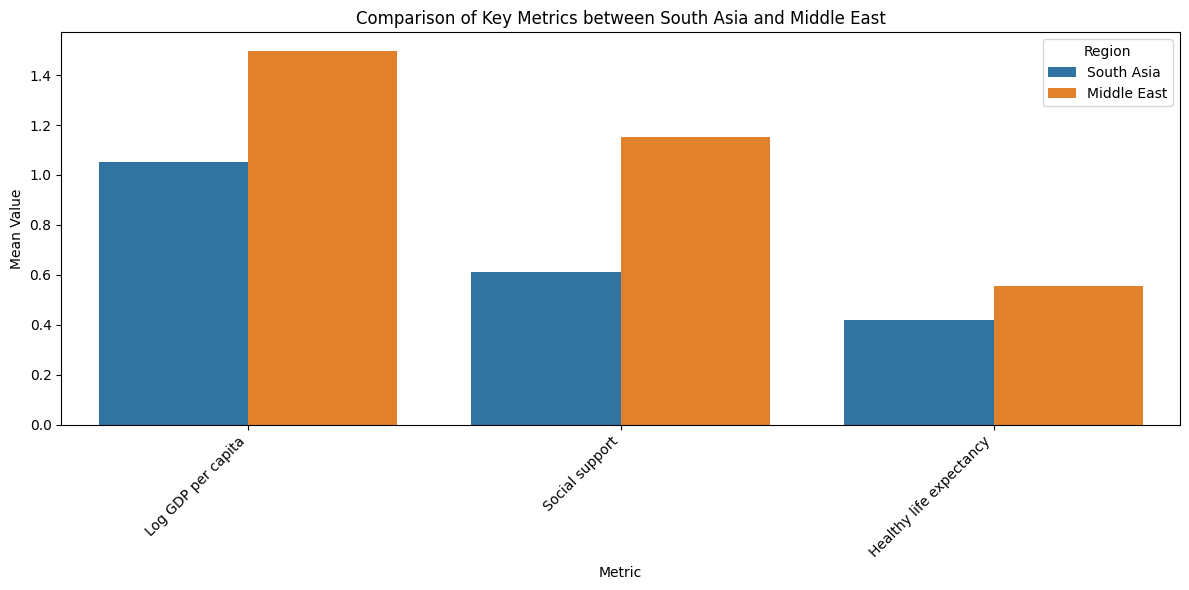

In [110]:
1# Select the metrics for comparison
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Create a list to store the data for plotting
data_for_plot = []

# Iterate through the regions and metrics to extract the data
for region, data in zip(['South Asia', 'Middle East'], [south_asia_data, middle_east_data]):
    for metric in metrics:
        # Calculate the mean value for the metric in the region
        mean_value = data[metric].mean()
        # Append the data to the list
        data_for_plot.append([region, metric, mean_value])

# Create a DataFrame from the data list
plot_df = pd.DataFrame(data_for_plot, columns=['Region', 'Metric', 'Mean Value'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Mean Value', hue='Region', data=plot_df)
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.xlabel('Metric')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



4.Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [111]:
# Calculate range and CV for South Asia
south_asia_range = south_asia_data['score'].max() - south_asia_data['score'].min()
south_asia_cv = south_asia_data['score'].std() / south_asia_data['score'].mean()

# Calculate range and CV for Middle East
middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()
middle_east_cv = middle_east_data['score'].std() / middle_east_data['score'].mean()

# Print the results
print("South Asia:")
print(f"Range: {south_asia_range:.2f}")
print(f"Coefficient of Variation (CV): {south_asia_cv:.2f}")

print("\nMiddle East:")
print(f"Range: {middle_east_range:.2f}")
print(f"Coefficient of Variation (CV): {middle_east_cv:.2f}")

# Compare variability
if south_asia_cv > middle_east_cv:
    print("\nSouth Asia has greater variability in happiness scores.")
else:
    print("\nMiddle East has greater variability in happiness scores.")

South Asia:
Range: 3.44
Coefficient of Variation (CV): 0.30

Middle East:
Range: 4.63
Coefficient of Variation (CV): 0.29

South Asia has greater variability in happiness scores.


5.Correlation Analysis:

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.


South Asia:
Correlation between Score and Freedom to make life choices: 0.80


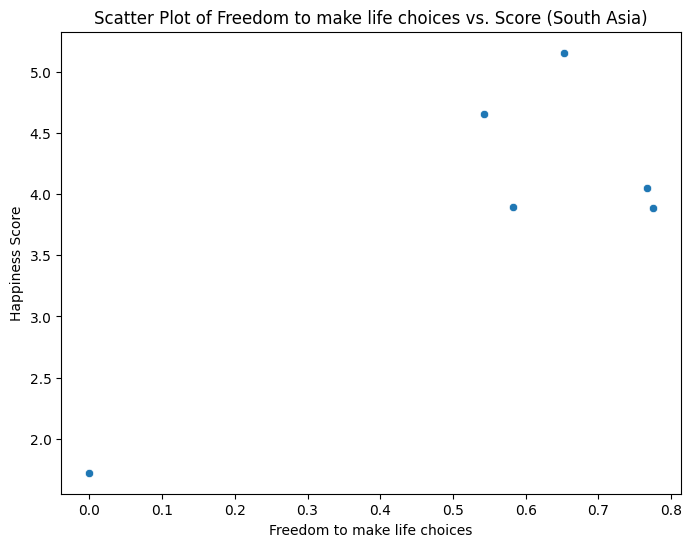

Correlation between Score and Generosity: 0.87


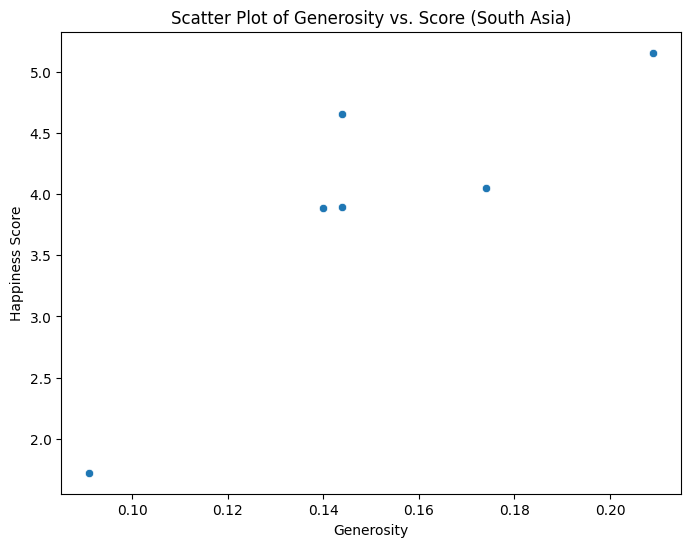


Middle East:
Correlation between Score and Freedom to make life choices: 0.86


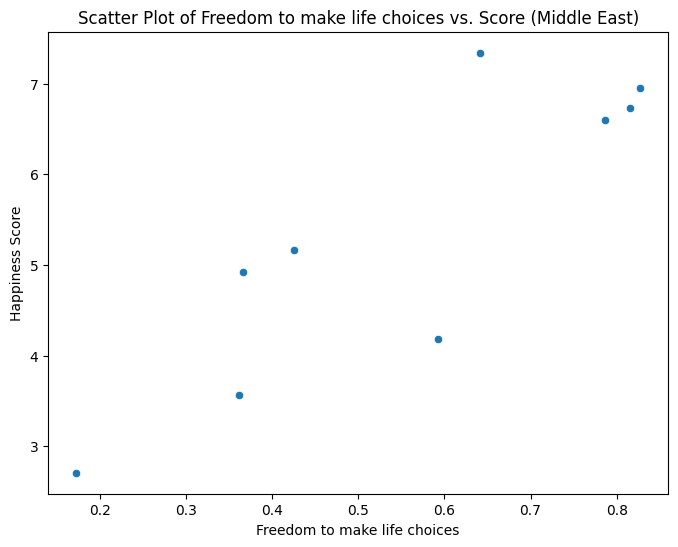

Correlation between Score and Generosity: 0.63


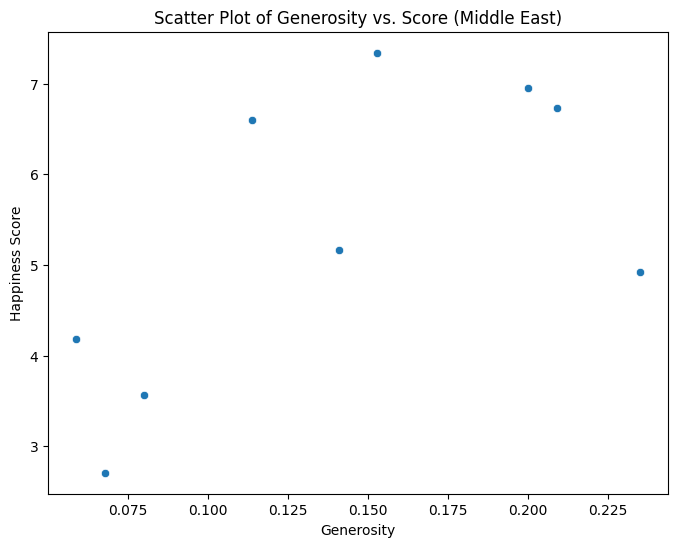

In [112]:
# Metrics for correlation analysis
metrics = ['Freedom to make life choices', 'Generosity']

# South Asia
print("\nSouth Asia:")
for metric in metrics:
    correlation = south_asia_data['score'].corr(south_asia_data[metric])
    print(f"Correlation between Score and {metric}: {correlation:.2f}")

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=metric, y='score', data=south_asia_data)
    plt.title(f'Scatter Plot of {metric} vs. Score (South Asia)')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.show()
3
6
# Middle East
print("\nMiddle East:")
for metric in metrics:
    correlation = middle_east_data['score'].corr(middle_east_data[metric])
    print(f"Correlation between Score and {metric}: {correlation:.2f}")

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=metric, y='score', data=middle_east_data)
    plt.title(f'Scatter Plot of {metric} vs. Score (Middle East)')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.show()

6.Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

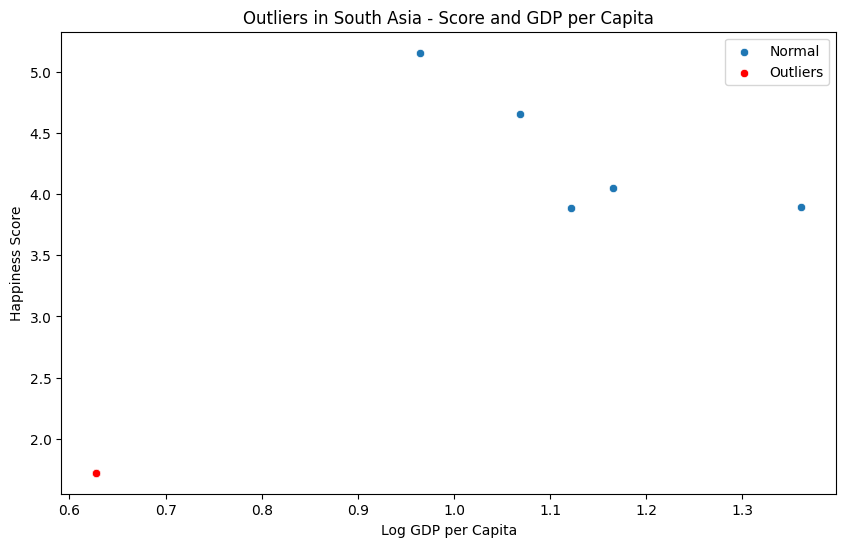

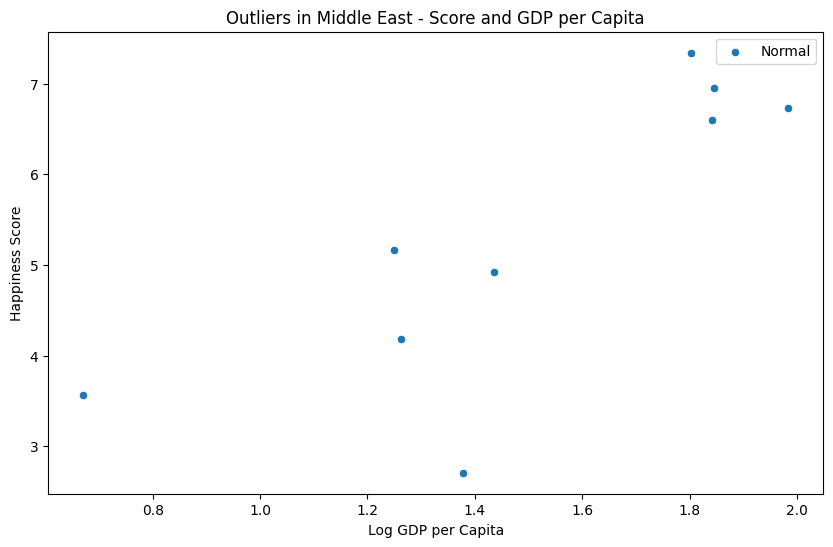


Discussion:

Outliers in South Asia:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Outliers in Middle East:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []

Implications:
Outliers can significantly influence the interpretation of the overall happiness trends in a region.
They often indicate unique circumstances or factors affecting happiness that are not captured by the general trend.
It's crucial to investigate these outliers further to understand their specific context and potential impact on the analysis.


In [113]:
# --- Outlier Detection ---

def detect_outliers(data, column):
    """Detects outliers in a given column using the IQR method."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)]
    return outliers

# Detect outliers for Score and GDP per Capita in South Asia
south_asia_score_outliers = detect_outliers(south_asia_data, 'score')
south_asia_gdp_outliers = detect_outliers(south_asia_data, 'Log GDP per capita')

# Detect outliers for Score and GDP per Capita in Middle East
middle_east_score_outliers = detect_outliers(middle_east_data, 'score')
middle_east_gdp_outliers = detect_outliers(middle_east_data, 'Log GDP per capita')

# --- Plotting and Discussion ---

# South Asia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, label='Normal')
sns.scatterplot(x='Log GDP per capita', y='score', data=pd.concat([south_asia_score_outliers, south_asia_gdp_outliers]), color='red', label='Outliers')
plt.title('Outliers in South Asia - Score and GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

# Middle East
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, label='Normal')
sns.scatterplot(x='Log GDP per capita', y='score', data=pd.concat([middle_east_score_outliers, middle_east_gdp_outliers]), color='red', label='Outliers')
plt.title('Outliers in Middle East - Score and GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

# --- Discussion ---

print("\nDiscussion:")

# South Asia Outliers
south_asia_outliers = pd.concat([south_asia_score_outliers, south_asia_gdp_outliers]).drop_duplicates()
print("\nOutliers in South Asia:")
print(south_asia_outliers[['Country name', 'score', 'Log GDP per capita']])
# Add your interpretation of South Asia outliers here

# Middle East Outliers
middle_east_outliers = pd.concat([middle_east_score_outliers, middle_east_gdp_outliers]).drop_duplicates()
print("\nOutliers in Middle East:")
print(middle_east_outliers[['Country name', 'score', 'Log GDP per capita']])
# Add your interpretation of Middle East outliers here

# General Discussion about Implications
print("\nImplications:")
print("Outliers can significantly influence the interpretation of the overall happiness trends in a region.")
print("They often indicate unique circumstances or factors affecting happiness that are not captured by the general trend.")
print("It's crucial to investigate these outliers further to understand their specific context and potential impact on the analysis.")

7.Visualization:

•Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

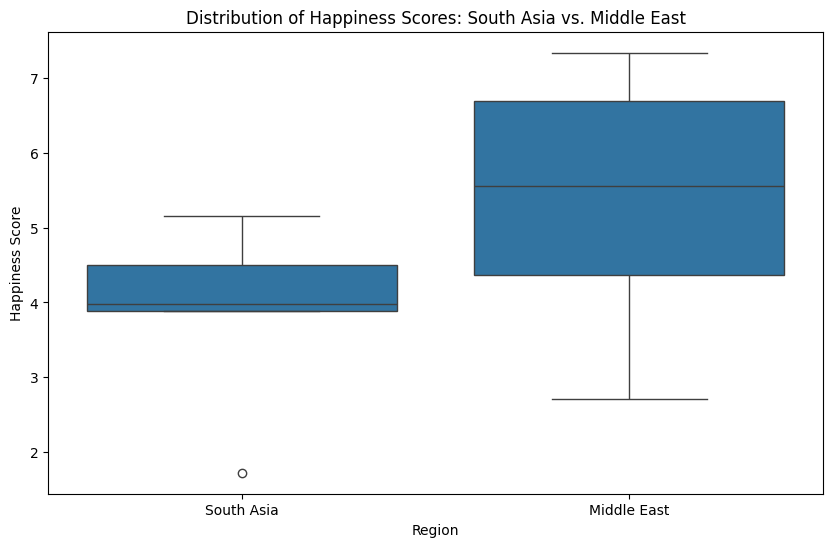


Interpretation:
- Distribution Shapes: Compare the overall shapes of the boxes (e.g., are they symmetric or skewed?).
- Medians: Compare the positions of the horizontal lines inside the boxes (medians).
- Outliers: Identify any points outside the whiskers (outliers).
- Variability: Compare the lengths of the boxes (interquartile range - IQR).
- Overall Comparison: Summarize the key differences and potential insights.


In [114]:
# --- Visualization ---

# Combine data for boxplot
comparison_data = pd.concat([
    south_asia_data[['Country name', 'score']].assign(Region='South Asia'),
    middle_east_data[['Country name', 'score']].assign(Region='Middle East')
])

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=comparison_data)
plt.title('Distribution of Happiness Scores: South Asia vs. Middle East')
plt.ylabel('Happiness Score')
plt.show()

# --- Interpretation ---

print("\nInterpretation:")

# Distribution Shapes:
print("- Distribution Shapes: Compare the overall shapes of the boxes (e.g., are they symmetric or skewed?).")
# Example:
# print("  - The distribution for South Asia appears to be slightly right-skewed, while the Middle East's distribution might be more symmetric.")

# Medians:
print("- Medians: Compare the positions of the horizontal lines inside the boxes (medians).")
# Example:
# print("  - The median happiness score for the Middle East seems to be slightly higher than that of South Asia.")

# Outliers:
print("- Outliers: Identify any points outside the whiskers (outliers).")
# Example:
# print("  - South Asia has a few outlier countries with lower happiness scores.")
# print("  - The Middle East might have outliers with higher scores.")

# Variability (Interquartile Range):
print("- Variability: Compare the lengths of the boxes (interquartile range - IQR).")
# Example:
# print("  - The IQR for South Asia is larger, suggesting greater variability in happiness scores within the region.")

# Overall Comparison:
print("- Overall Comparison: Summarize the key differences and potential insights.")
# Example:
# print("  - The Middle East generally shows higher happiness scores compared to South Asia, with a potentially smaller range of variation.")
# print("  - Outliers in both regions indicate countries with unique circumstances influencing their happiness levels.")